In [87]:
## import needed library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [88]:
## uplod the data 
train_df = pd.read_csv('train.csv')
print('the data has an {} column and {} rows'.format(train_df.shape[1] , train_df.shape[0]))

the data has an 12 column and 891 rows


# data assesing

In [89]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sex - PassengerId - Name - Ticket is uneeded <br>
merge sibSp and Parch in one colums

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


age has null values so need to fill 
cabin has many null values

In [91]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

cabin start with c , E , G , D , A , B , F , A ,T ... and i think that say the position of the cabvin and the number is the number of room so i will exxtract the first charachter only

# data cleaning 

In [93]:
def clean_titanic(df) :
    ## creat new columns
    df['relatives_no'] = df['SibSp'] + df['Parch'] 
    df['Cabin'] = df['Cabin'].str[0]
    df = pd.get_dummies(df, columns = ['Cabin']).drop(['Cabin_T' ] , axis=1)


    ## delete unneded column 
    df.drop( ['PassengerId' , 'Name' , 'Ticket' , 'SibSp' ,'Parch' ] , axis=1 , inplace=True)

    # rearrange colums 
    col = df.columns.tolist()
    col.remove('Survived')
    col.append('Survived') 
    df = df[col]
    return df


train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean()).astype(int)
train_df = train_df[train_df['Age']  > 0] 
train_df = clean_titanic(train_df)
train_df.dropna(inplace=True)

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        882 non-null    int64  
 1   Sex           882 non-null    object 
 2   Age           882 non-null    int32  
 3   Fare          882 non-null    float64
 4   Embarked      882 non-null    object 
 5   relatives_no  882 non-null    int64  
 6   Cabin_A       882 non-null    uint8  
 7   Cabin_B       882 non-null    uint8  
 8   Cabin_C       882 non-null    uint8  
 9   Cabin_D       882 non-null    uint8  
 10  Cabin_E       882 non-null    uint8  
 11  Cabin_F       882 non-null    uint8  
 12  Cabin_G       882 non-null    uint8  
 13  Survived      882 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(2), uint8(7)
memory usage: 57.7+ KB


# data analysis

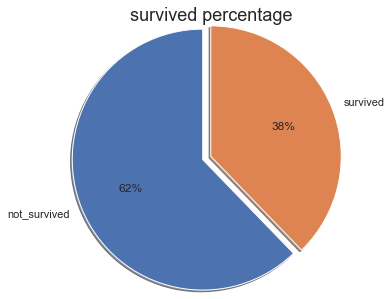

In [94]:
# know the percentage of those who survied and not survived

plt.pie(train_df['Survived'].value_counts().values , labels=['not_survived' , 'survived']
        , startangle = 90 , explode = [.1 ,0 ] , shadow = True , radius=1.5 , autopct='%1.0f%%');
plt.title('survived percentage\n' , fontsize=18);

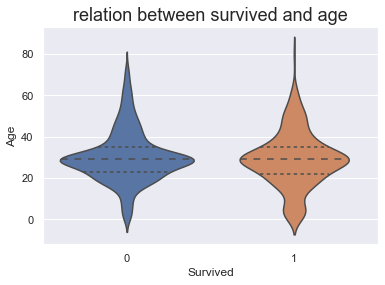

In [95]:
sns.violinplot(x='Survived' , y='Age' , data=train_df , inner='quartile')
plt.ylabel('Age');
plt.title('relation between survived and age' , fontsize=18);

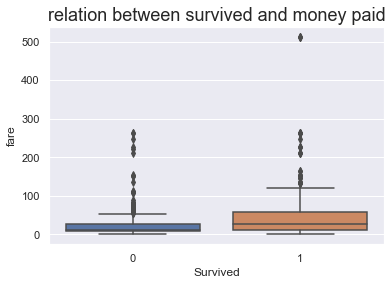

In [96]:
sns.boxplot(x='Survived' , y='Fare' , data=train_df )
plt.ylabel('fare');
plt.title('relation between survived and money paid' , fontsize=18);

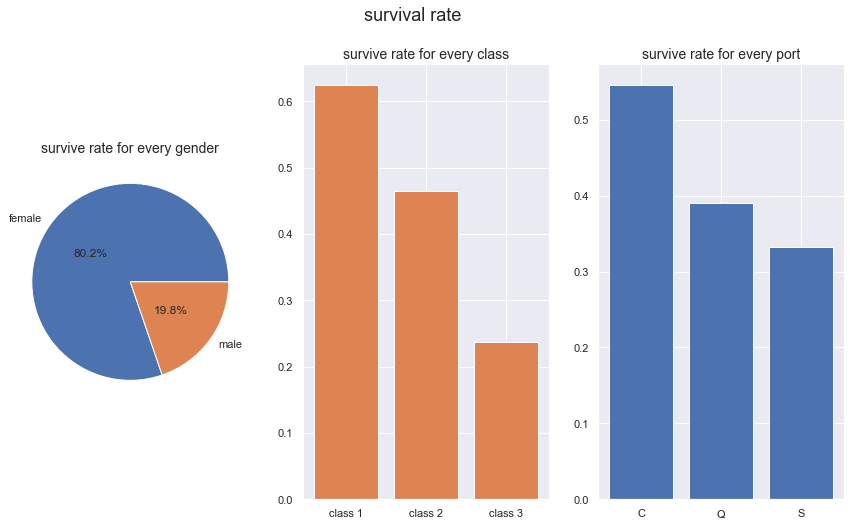

In [97]:
fig, ax1  = plt.subplots(1, 3 , figsize=(15 , 8))
fig.suptitle('survival rate' , fontsize=18)

data = train_df.groupby(['Sex']).mean()['Survived']
labels = data.keys()
ax1[0].pie(x=data, autopct="%.1f%%", normalize=True, labels=labels, pctdistance=0.5)
ax1[0].set_title("survive rate for every gender", fontsize=14);

data = train_df.groupby(['Pclass']).mean()['Survived']
ax1[1].bar(['class 1' , 'class 2' , 'class 3'] , data.values );
ax1[1].set_title("survive rate for every class", fontsize=14);

data = train_df.groupby(['Pclass']).mean()['Survived']
ax1[1].bar(['class 1' , 'class 2' , 'class 3'] , data.values );
ax1[1].set_title("survive rate for every class", fontsize=14);

data = train_df.groupby(['Embarked']).mean()['Survived']
ax1[2].bar(data.index , data.values );
ax1[2].set_title("survive rate for every port", fontsize=14);


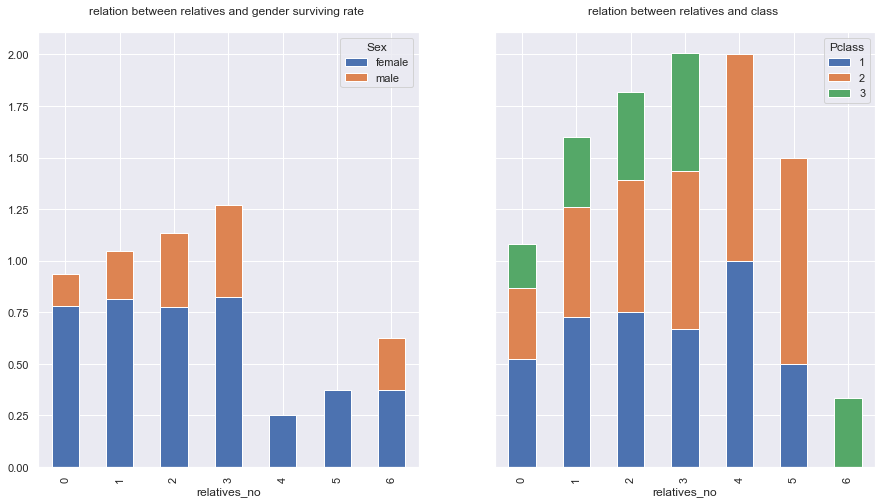

In [122]:
fig, ax1  = plt.subplots(1, 2 , figsize=(15 , 8) , sharey=True)

data = train_df.groupby(['relatives_no' , 'Sex']).mean()['Survived']
data.unstack().plot(kind='bar' , stacked=True , ax=ax1[0]) ; 
ax1[0].set_xlim(-.5 , 6.5) ; 
ax1[0].set_title('relation between relatives and gender surviving rate \n ');


data = train_df.groupby(['relatives_no' , 'Pclass']).mean()['Survived']
data.unstack().plot(kind='bar' , stacked=True , ax=ax1[1]) ; 
ax1[1].set_title('relation between relatives and class \n ');
ax1[1].set_xlim(-.5 , 6.5) ; 



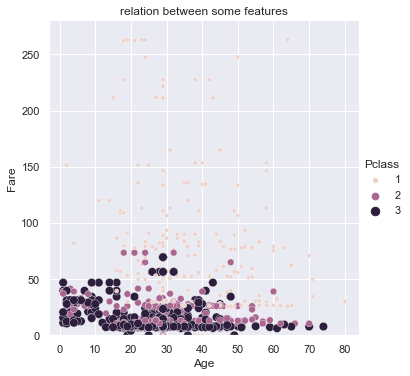

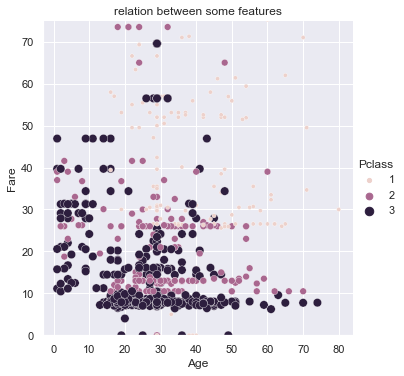

In [84]:
sns.relplot(x='Age' , y='Fare', size='Pclass' , hue='Pclass' , data=train_df );
plt.ylim(0,280);
plt.title('relation between some features');
sns.relplot(x='Age' , y='Fare', size='Pclass' , hue='Pclass' , data=train_df );
plt.ylim(0,75);
plt.title('relation between some features');

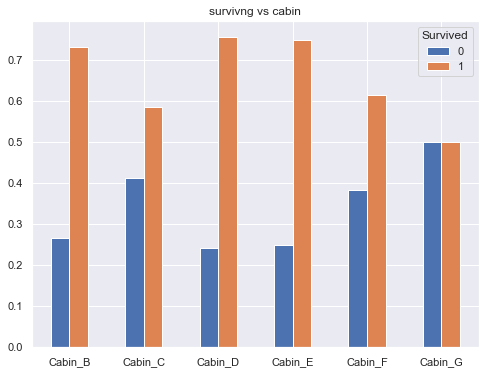

In [164]:
d1 = train_df.groupby('Survived').sum()[['Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G']]
d2 = train_df.sum()[['Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G']]
data = d1/d2
data.T.plot(kind='bar');
plt.title('survivng vs cabin');
plt.xticks(rotation=0);


In [165]:
train_df.head()

,Pclass,Sex,Age,Fare,Embarked,relatives_no,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Survived
0,3,male,22,7.2500,S,1,0,0,0,0,0,0,0,0
1,1,female,38,71.2833,C,1,0,0,1,0,0,0,0,1
2,3,female,26,7.9250,S,0,0,0,0,0,0,0,0,1
3,1,female,35,53.1000,S,1,0,0,1,0,0,0,0,1
4,3,male,35,8.0500,S,0,0,0,0,0,0,0,0,0


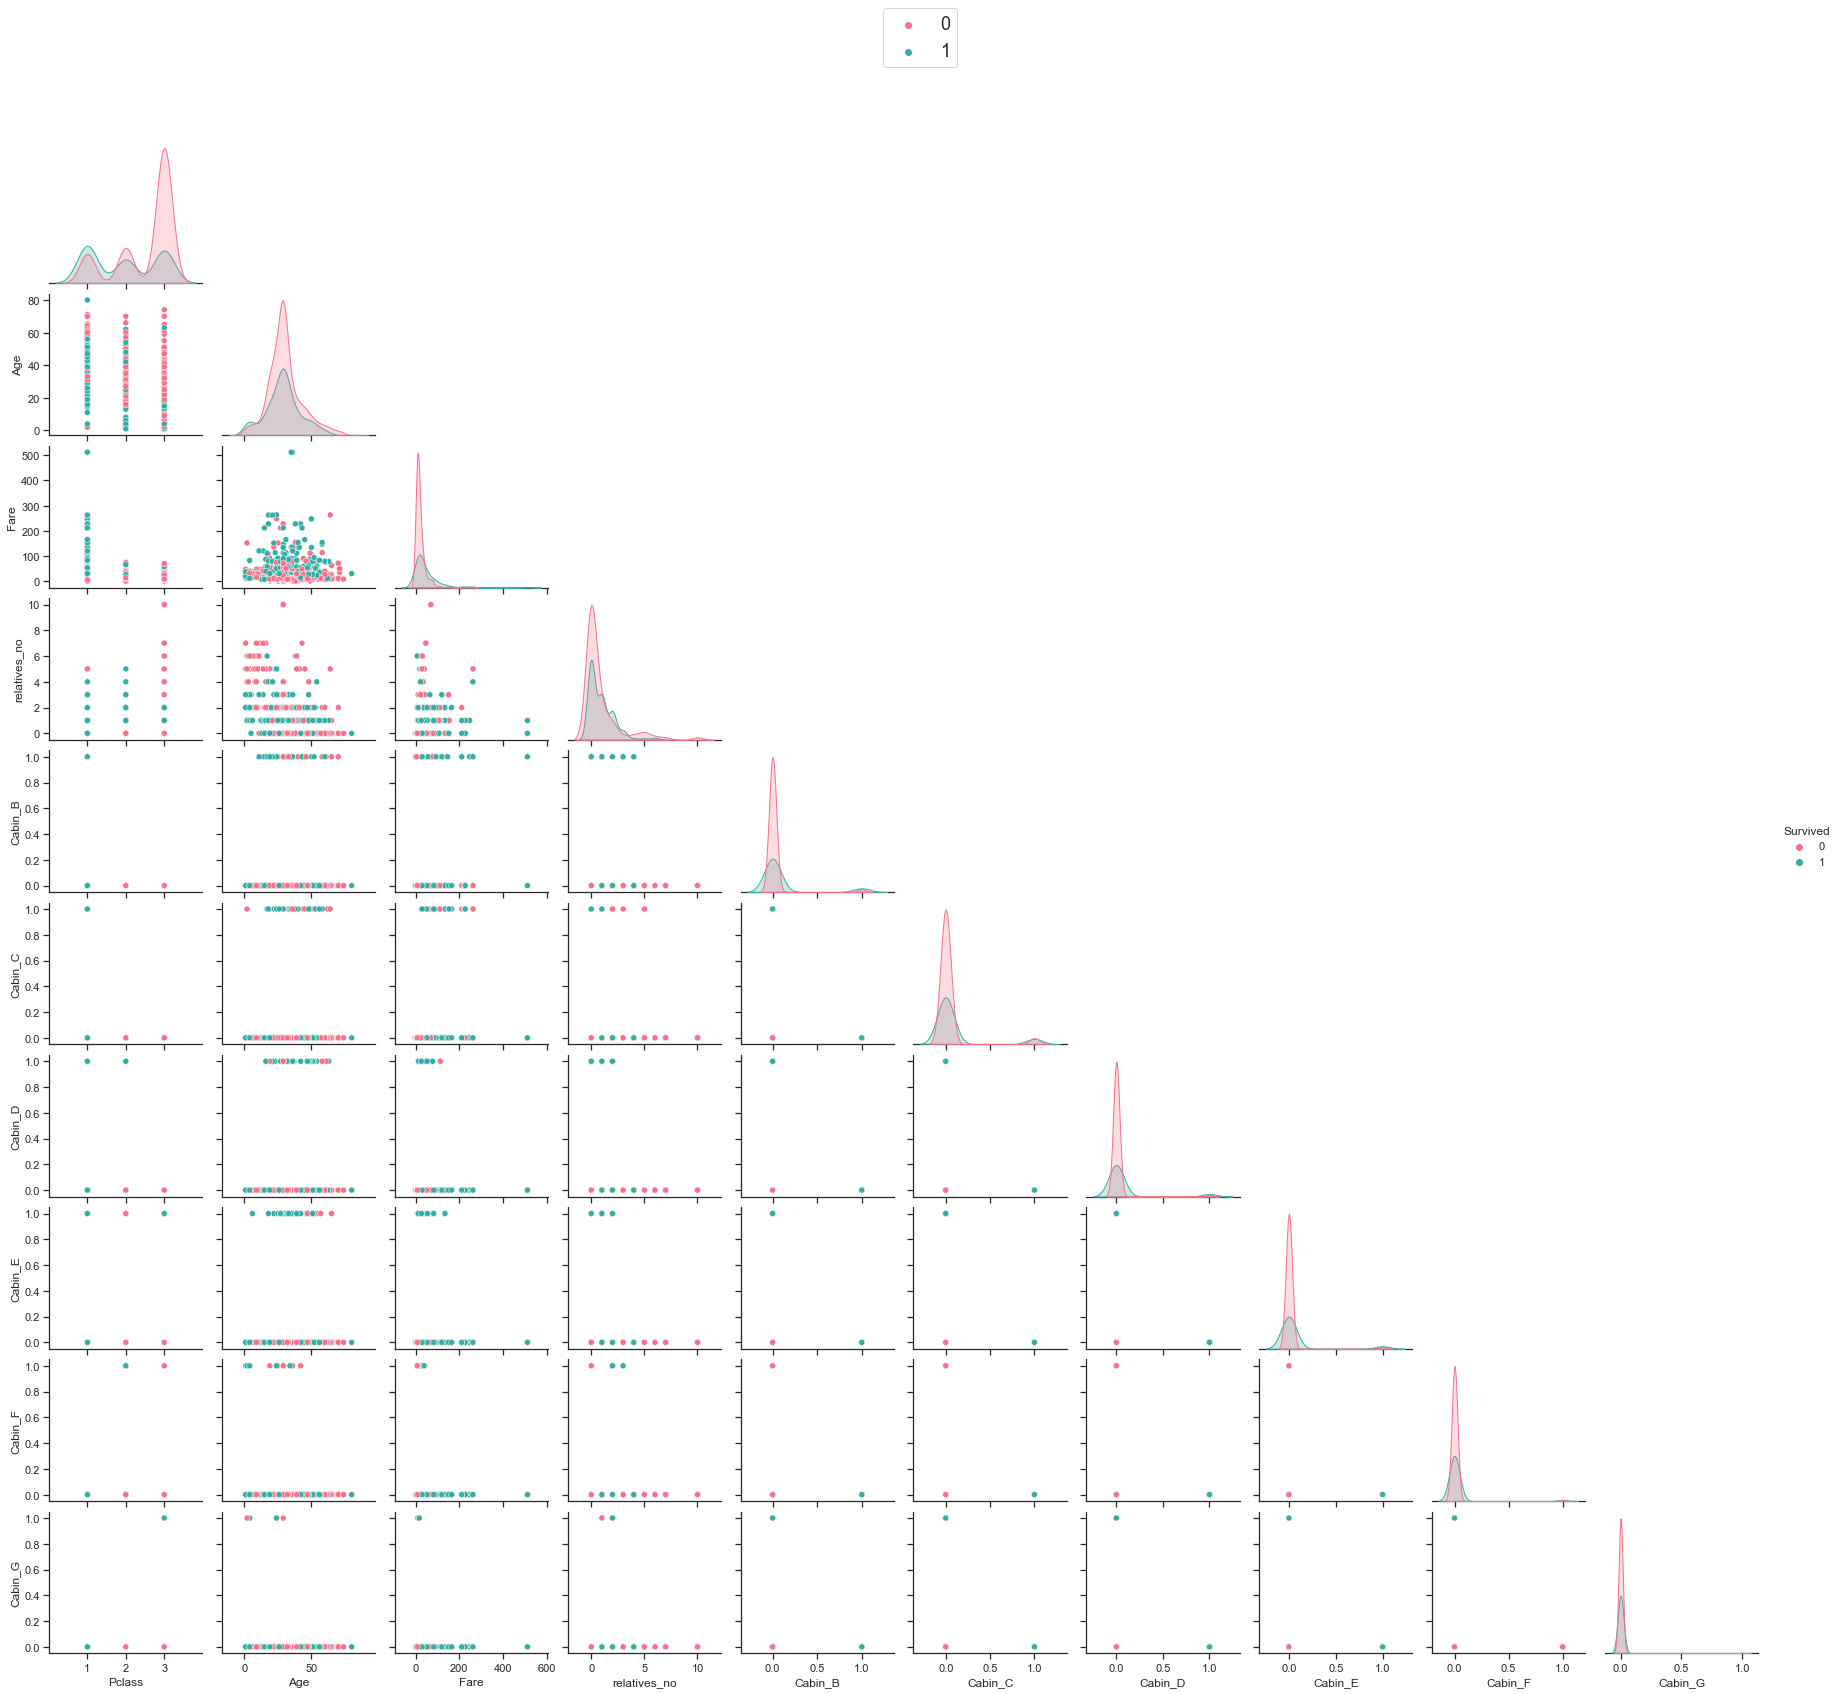

In [85]:
g = sns.set(style="ticks", color_codes=True)
g= sns.pairplot(train_df, hue="Survived", palette="husl",corner=True );
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1 , fontsize=18);
g.fig.subplots_adjust(top=0.92, bottom=0.08);

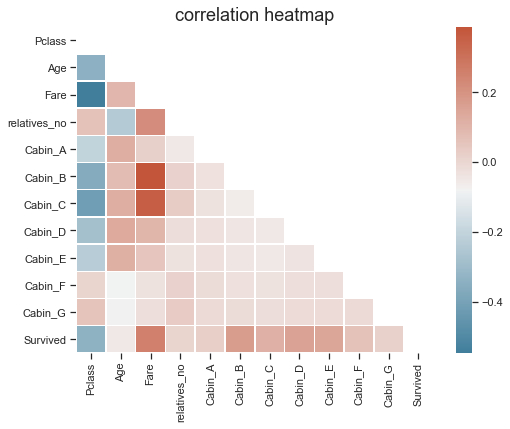

In [23]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool));
cmap = sns.diverging_palette(230, 20, as_cmap=True);
sns.heatmap(corr, mask=mask, cmap=cmap , linewidths=.5);
plt.title('correlation heatmap' , fontsize=18);

# prediction model

In [167]:
genders = {"male": 0, "female": 1}
Embarked = ports = {"S": 0, "C": 1, "Q": 2}

train_df['Embarked'] = train_df['Embarked'].map(ports)
train_df['Sex'] = train_df['Sex'].map(genders)

In [168]:
#determine x , y
x = train_df.drop('Survived' , axis=1)
y = train_df.Survived

x.shape , y.shape

((882, 13), (882,))

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True) 
x = scaler.fit_transform(x)
print('X \n' , x[0]) 

X 
 [ 0.82399768 -0.736178   -0.60628992 -0.49922909 -0.56799253  0.06461605
 -0.13153341 -0.23186945 -0.26530803 -0.19715288 -0.1940285  -0.12230995
 -0.06749673]


In [170]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True) 
 
print('X_train shape is ' , x_train.shape) 
print('X_test shape is ' , x_test.shape) 
print('y_train shape is ' , y_train.shape) 
print('y_test shape is ' , y_test.shape)

X_train shape is  (705, 13)
X_test shape is  (177, 13)
y_train shape is  (705,)
y_test shape is  (177,)


In [171]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',
                                                     max_depth=15,random_state=33)
DecisionTreeClassifierModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeClassifier.score(self = DecisionTreeClassifierModel , X= x_train, y= y_train) ) 
print('DecisionTreeRegressor Test Score is : ' ,DecisionTreeClassifier.score(self = DecisionTreeClassifierModel , X= x_test, y= y_test))

DecisionTreeRegressor Train Score is :  0.9645390070921985
DecisionTreeRegressor Test Score is :  0.8418079096045198


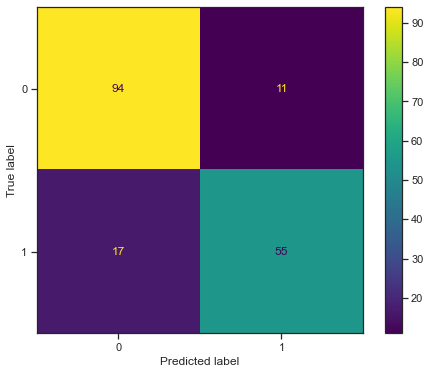

F1 Score is :  0.8418079096045198

Classification Report is :                precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.83      0.76      0.80        72

    accuracy                           0.84       177
   macro avg       0.84      0.83      0.83       177
weighted avg       0.84      0.84      0.84       177



In [172]:
from sklearn.metrics import f1_score ,classification_report , plot_confusion_matrix
sns.set(style="ticks", color_codes=True)

y_pred = DecisionTreeClassifierModel.predict(x_test)
plot_confusion_matrix(DecisionTreeClassifierModel, x_test, y_test ) ;
plt.show()
 
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)

ClassificationReport = classification_report(y_test,y_pred) 
print('\nClassification Report is : ', ClassificationReport )

# the test data set

In [186]:
test_df = pd.read_csv('test.csv')
ids = test_df['PassengerId']
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [187]:
## creat new columns
test_df['relatives_no'] = test_df['SibSp'] + test_df['Parch'] 
test_df['Cabin'] = test_df['Cabin'].str[0]
test_df = pd.get_dummies(test_df, columns = ['Cabin'])
## delete unneded column 
test_df.drop( ['PassengerId' , 'Name' , 'Ticket' , 'SibSp' ,'Parch' ] , axis=1 , inplace=True)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean()).astype(int)
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean()).astype(int)


test_df['Embarked'] = test_df['Embarked'].map(ports)
test_df['Sex'] = test_df['Sex'].map(genders)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True) 
x_sub = scaler.fit_transform(test_df)
print('test X \n' , x_sub[0]) 


test X 
 [ 0.87348191 -0.75592895  0.3013391  -0.5052799   2.24316522 -0.5534426
 -0.13050529 -0.21213203 -0.30229756 -0.17916128 -0.14834045 -0.13968606
 -0.04897021]


In [188]:
df = pd.read_csv('gender_submission.csv')

prediction = DecisionTreeClassifierModel.predict(x_sub)
sub_df = pd.DataFrame(list(zip(ids, prediction)) , columns=df.columns)

In [189]:
sub_df.to_csv('submission.csv' , index=False)

# my score 

In [190]:
(sub_df == df ).sum()['Survived'] / df['Survived'].count()

0.7966507177033493

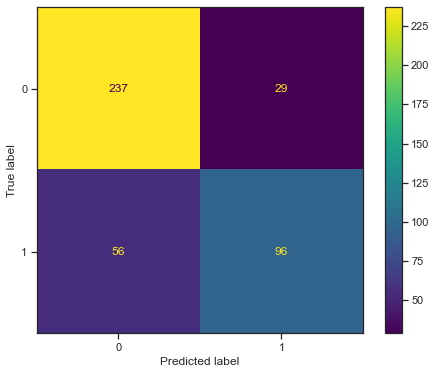

F1 Score is :  0.8418079096045198


In [191]:
plot_confusion_matrix(DecisionTreeClassifierModel, x_sub, df['Survived'] ) ;
plt.show()
 
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)
